# 1. Read JSON file

It is possible to use the Python library [Pandas](http://pandas.pydata.org) to read the dataset, which is given in [JSON](http://json.org) format:

In [1]:
import numpy
import pandas

In [2]:
data = pandas.read_json('sample.txt')

Next step removes unnecessary information and renames conveniently the columns of the dataframe:

In [3]:
data.drop(['emit','infAdic','total','versaoDocumento'], axis=1, inplace=True)
data.columns = ['value','items','time']

In [4]:
data.head()

,value,items,time
0,{'valorTotal': 24.9},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:01:54.000Z'...
1,{'valorTotal': 92.53},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:03:52.000Z'...
2,{'valorTotal': 57.86},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:16:40.000Z'...
3,{'valorTotal': 34.97},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:17:50.000Z'...
4,{'valorTotal': 46.23},"[{'nItem': '1', 'prod': {'indTot': '1', 'qCom'...",{'dhEmi': {'$date': '2016-01-05T12:18:35.000Z'...


## Parse and extract the data
The following code retrieves name-value pairs for each item using the syntax of [dict comprehensions](https://www.python.org/dev/peps/pep-0274/). Other manipulations are done to parse the data and extract useful information.

In [5]:
key_value = lambda items: { i['prod']['xProd']:i['prod']['vProd'] for i in items }
data['items'] = data['items'].apply(key_value)

In [6]:
data['value'] = data['value'].apply( lambda x: x['valorTotal'] )

In [7]:
data['time'] = data['time'].apply( lambda x: x['dhEmi']['$date'] )
data['time'] = pandas.to_datetime(data['time'])

In [8]:
data.head()

,value,items,time
0,24.90,"{'AGUA': 3.5, 'BUFFET': 21.4}",2016-01-05 12:01:54
1,92.53,"{'BUFFET': 83.55, 'REFRIGERANTE': 9.0}",2016-01-05 12:03:52
2,57.86,"{'SUCO': 4.5, 'BUFFET': 53.37}",2016-01-05 12:16:40
3,34.97,{'BUFFET': 34.98},2016-01-05 12:17:50
4,46.23,{'BUFFET': 46.23},2016-01-05 12:18:35


# 2. Consumption pattern

The income of the transactions can be arranged in a 2-dimensional matrix with the number of rows equal to the number of transactions and the number of columns equal to the number of products. A cell **( i , j )** contains the income due to product **j** in the transaction **i**; otherwise, NaN is displayed.

In [9]:
the_items = pandas.DataFrame(data['items'].tolist())

In [10]:
the_items.head()

,AGUA,BACARDI,BUFFET,BULE CHA,CAFE EXPRESSO,CAIPIRINHA,CAIPIROSKA,CERVEJA,CERVEJA LATA,CHA,...,SAKE,SASHIMI,SOBREMESA,SUCO,SUSHI ESPECIAL,TEMAKI,URAMAKI,VINHO,WHISKY,YAKISSOBA
0,3.5,NaN,21.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,83.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,53.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,34.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,46.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
the_items.describe()

,AGUA,BACARDI,BUFFET,BULE CHA,CAFE EXPRESSO,CAIPIRINHA,CAIPIROSKA,CERVEJA,CERVEJA LATA,CHA,...,SAKE,SASHIMI,SOBREMESA,SUCO,SUSHI ESPECIAL,TEMAKI,URAMAKI,VINHO,WHISKY,YAKISSOBA
count,405.000000,1.0,1635.000000,8.0,20.000000,7.000000,9.000000,91.000000,57.000000,83.000000,...,36.000000,3.000000e+00,16.000000,173.000000,43.000000,14.000000,1.0,1.0,16.00000,3.000000
mean,6.154815,7.0,46.191755,8.2,4.200000,15.428571,17.000000,7.590659,12.584211,1.265060,...,19.997222,2.160000e+01,11.925000,7.711850,18.734884,14.742857,15.0,19.0,19.40000,44.800000
std,4.529104,NaN,29.323780,0.0,1.831019,5.855400,4.974937,6.024104,9.490381,0.645516,...,11.931028,4.351168e-15,5.345091,5.110158,43.625740,4.194816,NaN,NaN,10.79611,2.771281
min,3.500000,7.0,7.680000,8.2,3.500000,12.000000,15.000000,4.500000,6.000000,1.000000,...,15.000000,2.160000e+01,6.000000,4.500000,6.500000,12.000000,15.0,19.0,12.50000,43.200000
25%,3.500000,7.0,26.470000,8.2,3.500000,12.000000,15.000000,4.500000,6.500000,1.000000,...,15.000000,2.160000e+01,8.000000,4.500000,6.500000,12.600000,15.0,19.0,12.50000,43.200000
50%,3.500000,7.0,36.630000,8.2,3.500000,12.000000,15.000000,4.500000,9.800000,1.000000,...,16.000000,2.160000e+01,12.000000,4.500000,9.800000,14.400000,15.0,19.0,12.50000,43.200000
75%,10.500000,7.0,58.510000,8.2,3.500000,18.000000,15.000000,9.000000,13.000000,1.000000,...,20.900000,2.160000e+01,12.000000,11.000000,14.000000,14.400000,15.0,19.0,25.00000,45.600000
max,31.500000,7.0,335.860000,8.2,10.500000,24.000000,30.000000,36.000000,52.000000,4.000000,...,83.600000,2.160000e+01,24.000000,27.000000,295.000000,28.800000,15.0,19.0,45.80000,48.000000


Some statistical quantities describing the consumption pattern were displayed. From these results, it is possible to conclude that **BUFFET** is the product with largest income.

# 3. Sales forecast for the next week

The given dataset contain transactions spanning a period of 3 weeks.

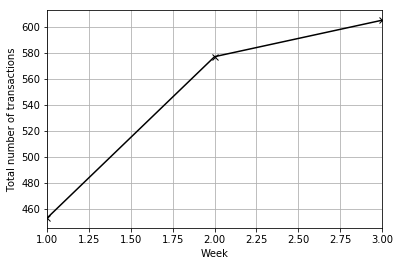

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

week_data = data.groupby(data['time'].dt.week)

week_data.count().plot(y='value', color='Black', marker='x', legend=False)
plt.xlabel('Week')
plt.ylabel('Total number of transactions')
plt.grid(True)

## Linear regression

The sales forecast for the next week can be estimated by linear regression:

In [16]:
from sklearn import linear_model

y = week_data.sum().values
X = numpy.arange(1,len(y)+1)

reg = linear_model.LinearRegression().fit(X.reshape(-1, 1), y)

a = reg.intercept_
b = reg.coef_[0]

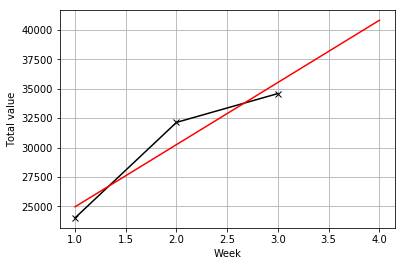

In [17]:
fig, ax = plt.subplots()

xx = numpy.linspace(1,len(y)+1)
yy = a + b*xx

ax.plot(X, y.ravel(), color='Black', marker='x')
ax.plot(xx, yy, color='Red')

plt.xlabel('Week')
plt.ylabel('Total value')
plt.grid(True)

In [18]:
a + 4*b

array([ 40821.53333333])

The total value of sells forecated for next week is close to **41000**.